In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score


Rows Columns
(569, 31)
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area

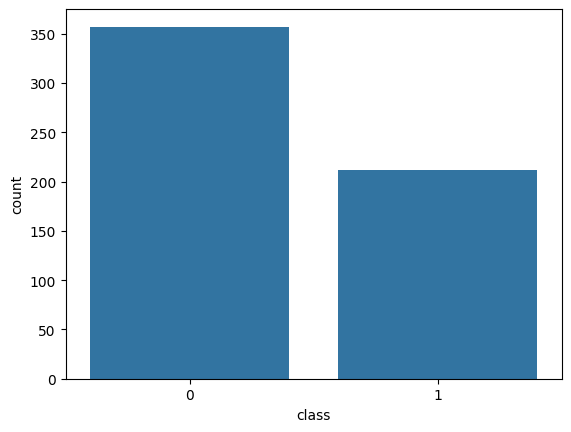

In [3]:
#Read and Display Data Set

#First, read in CSV and assign it to a variable called "data"
data = pd.read_csv("data/breast_cancer_diagnosis.csv")

#Second, display maximum rows and columns
print('\nRows Columns') #Indicates rows and columns
print(data.shape) #gets the number of rows and columns of data set

pd.set_option('display.max_columns', None) #optional setting to show all feature columns

#Third, display first five rows to check data
print(data.head(5))

#Select last column (assuming the last column is the class)
last_column = data.iloc[:, -1] #using iloc to select the last column

#Count occurences of 0's and 1's
value_counts = last_column.value_counts()

#Print the value counts and check for imbalance
print('\n' , value_counts)

sns.countplot(x="class", data=data)
plt.show()

Axes(0.125,0.11;0.62x0.77)


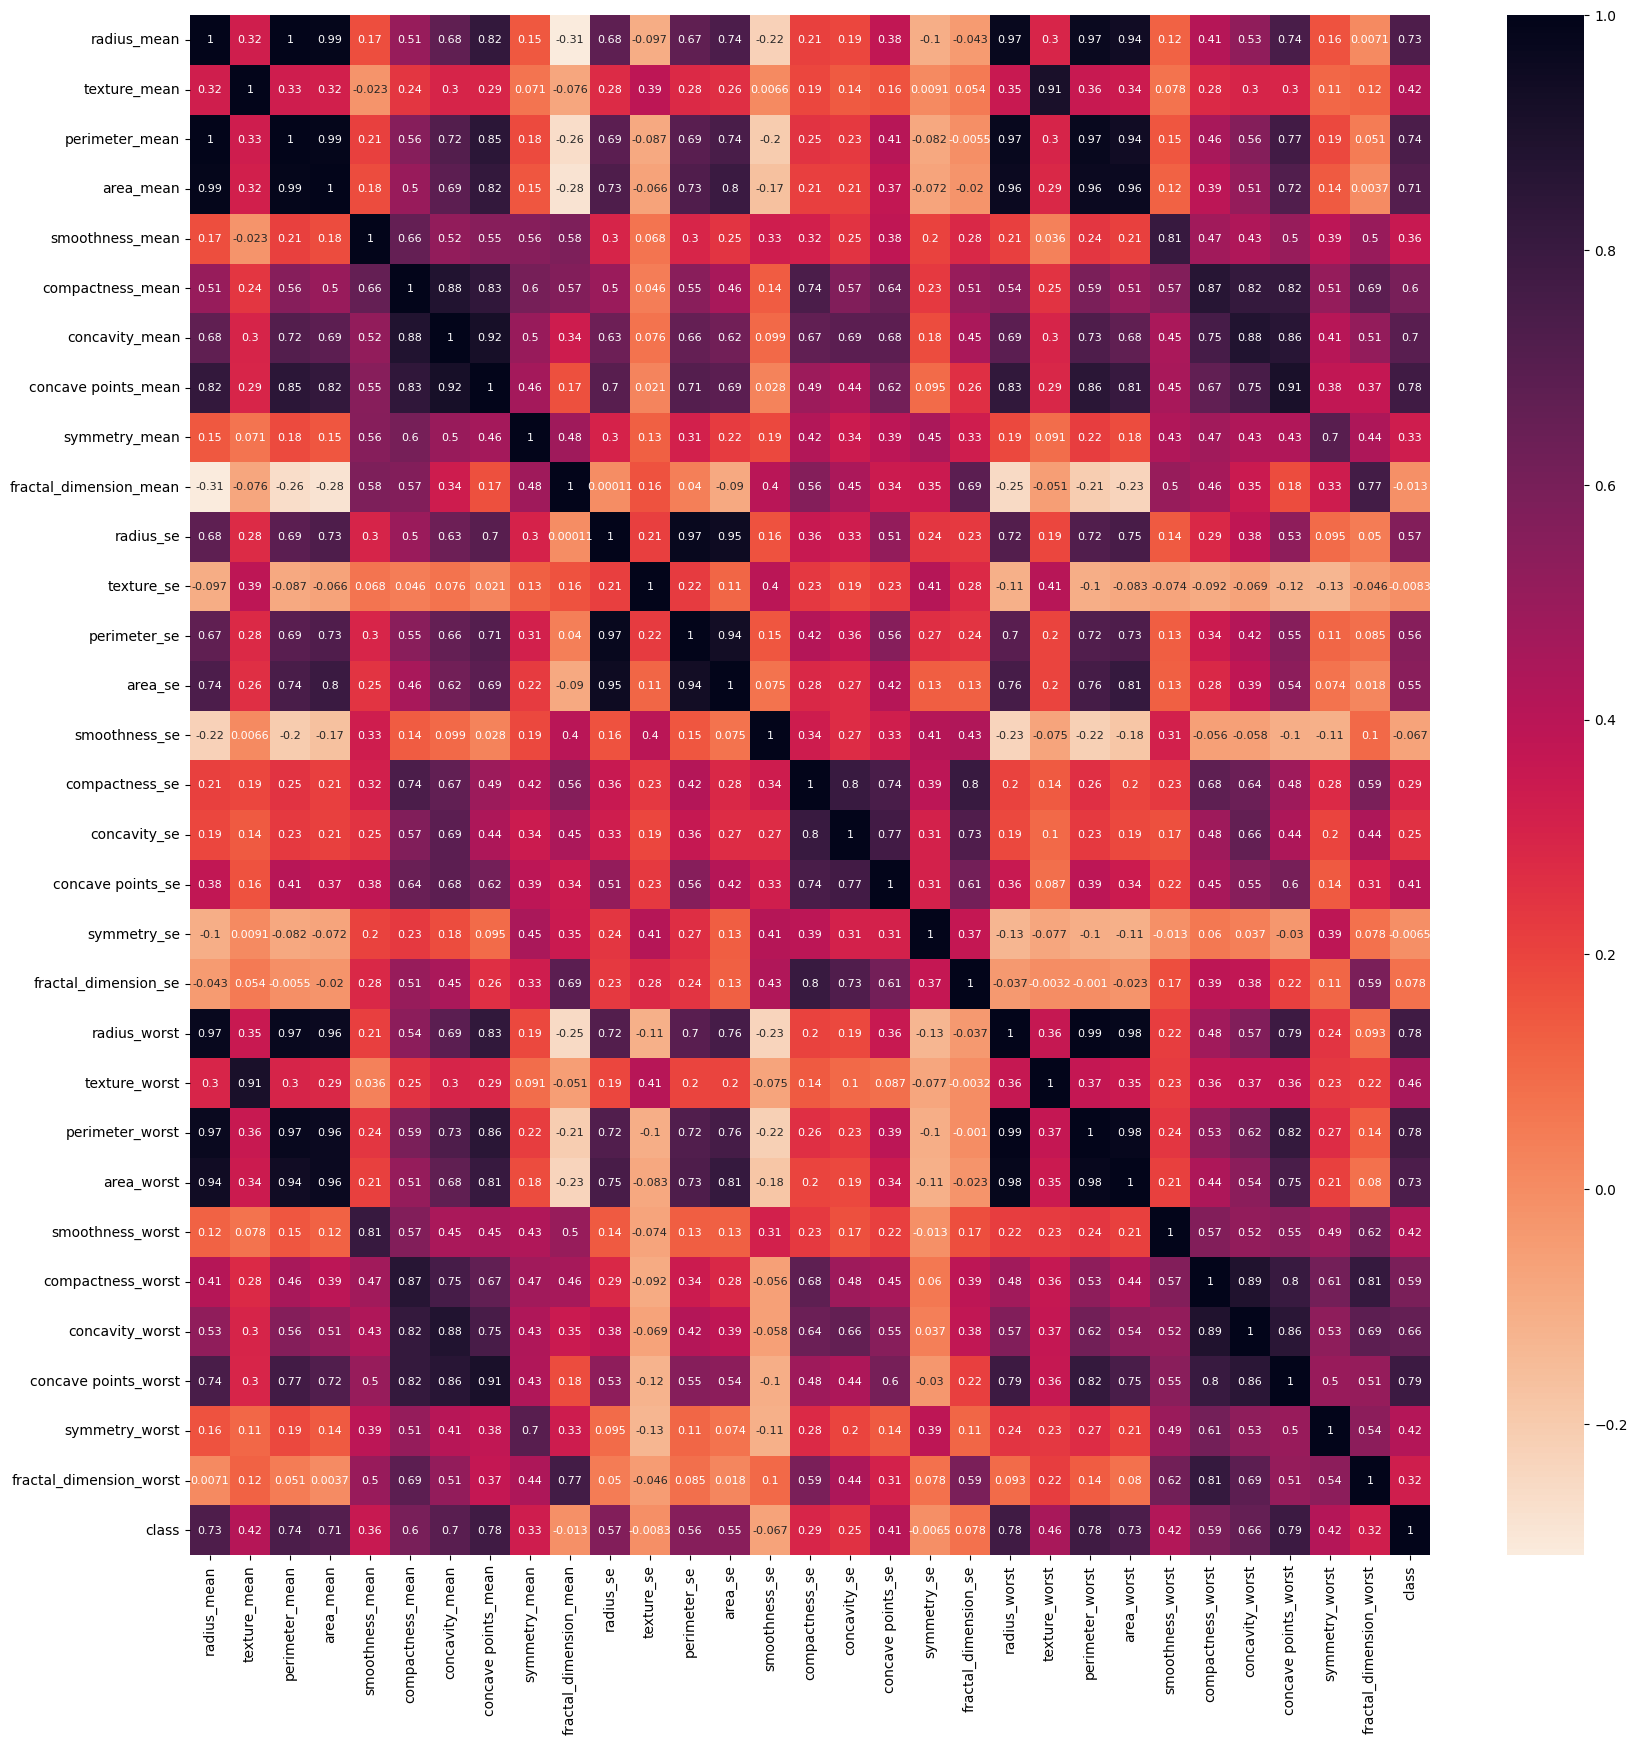

In [4]:
#Display Feature Relations of Data Set
plt.figure(figsize=(20,20)) #Adjust width and height
print(sns.heatmap(data.corr(),annot=True, annot_kws={"size":8}, cmap= sns.cm.rocket_r))

In [5]:
#Declare X and Y Variables and Split the Dataset into Train and Test sections
X=data.drop(['class'], axis=1).values #X Variables = all common except the last one

#Declare last column to be the Dependent variable Y
y=data['class'].values #Y Variable = last column

#Split Data Set 70% training and 30% Testing. Initial data shuffle to zero
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=0)

In [6]:
#Create and Test the Model

#First, declare a new model
classifier_model = DecisionTreeClassifier()

#Second, Train (fit) the model from the training data
classifier_model.fit(X_train, y_train)

#Fourth, Test the model using the testing data
y_pred = classifier_model.predict(X_test)
print('\nTest Data Model = ', y_pred)


Test Data Model =  [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0]



Confusion Matrix = 
 [[100   8]
 [  3  60]]

Accuracy =  0.935672514619883

Precision =  0.8823529411764706

Recall =  0.9523809523809523

F1 Score =  0.916030534351145


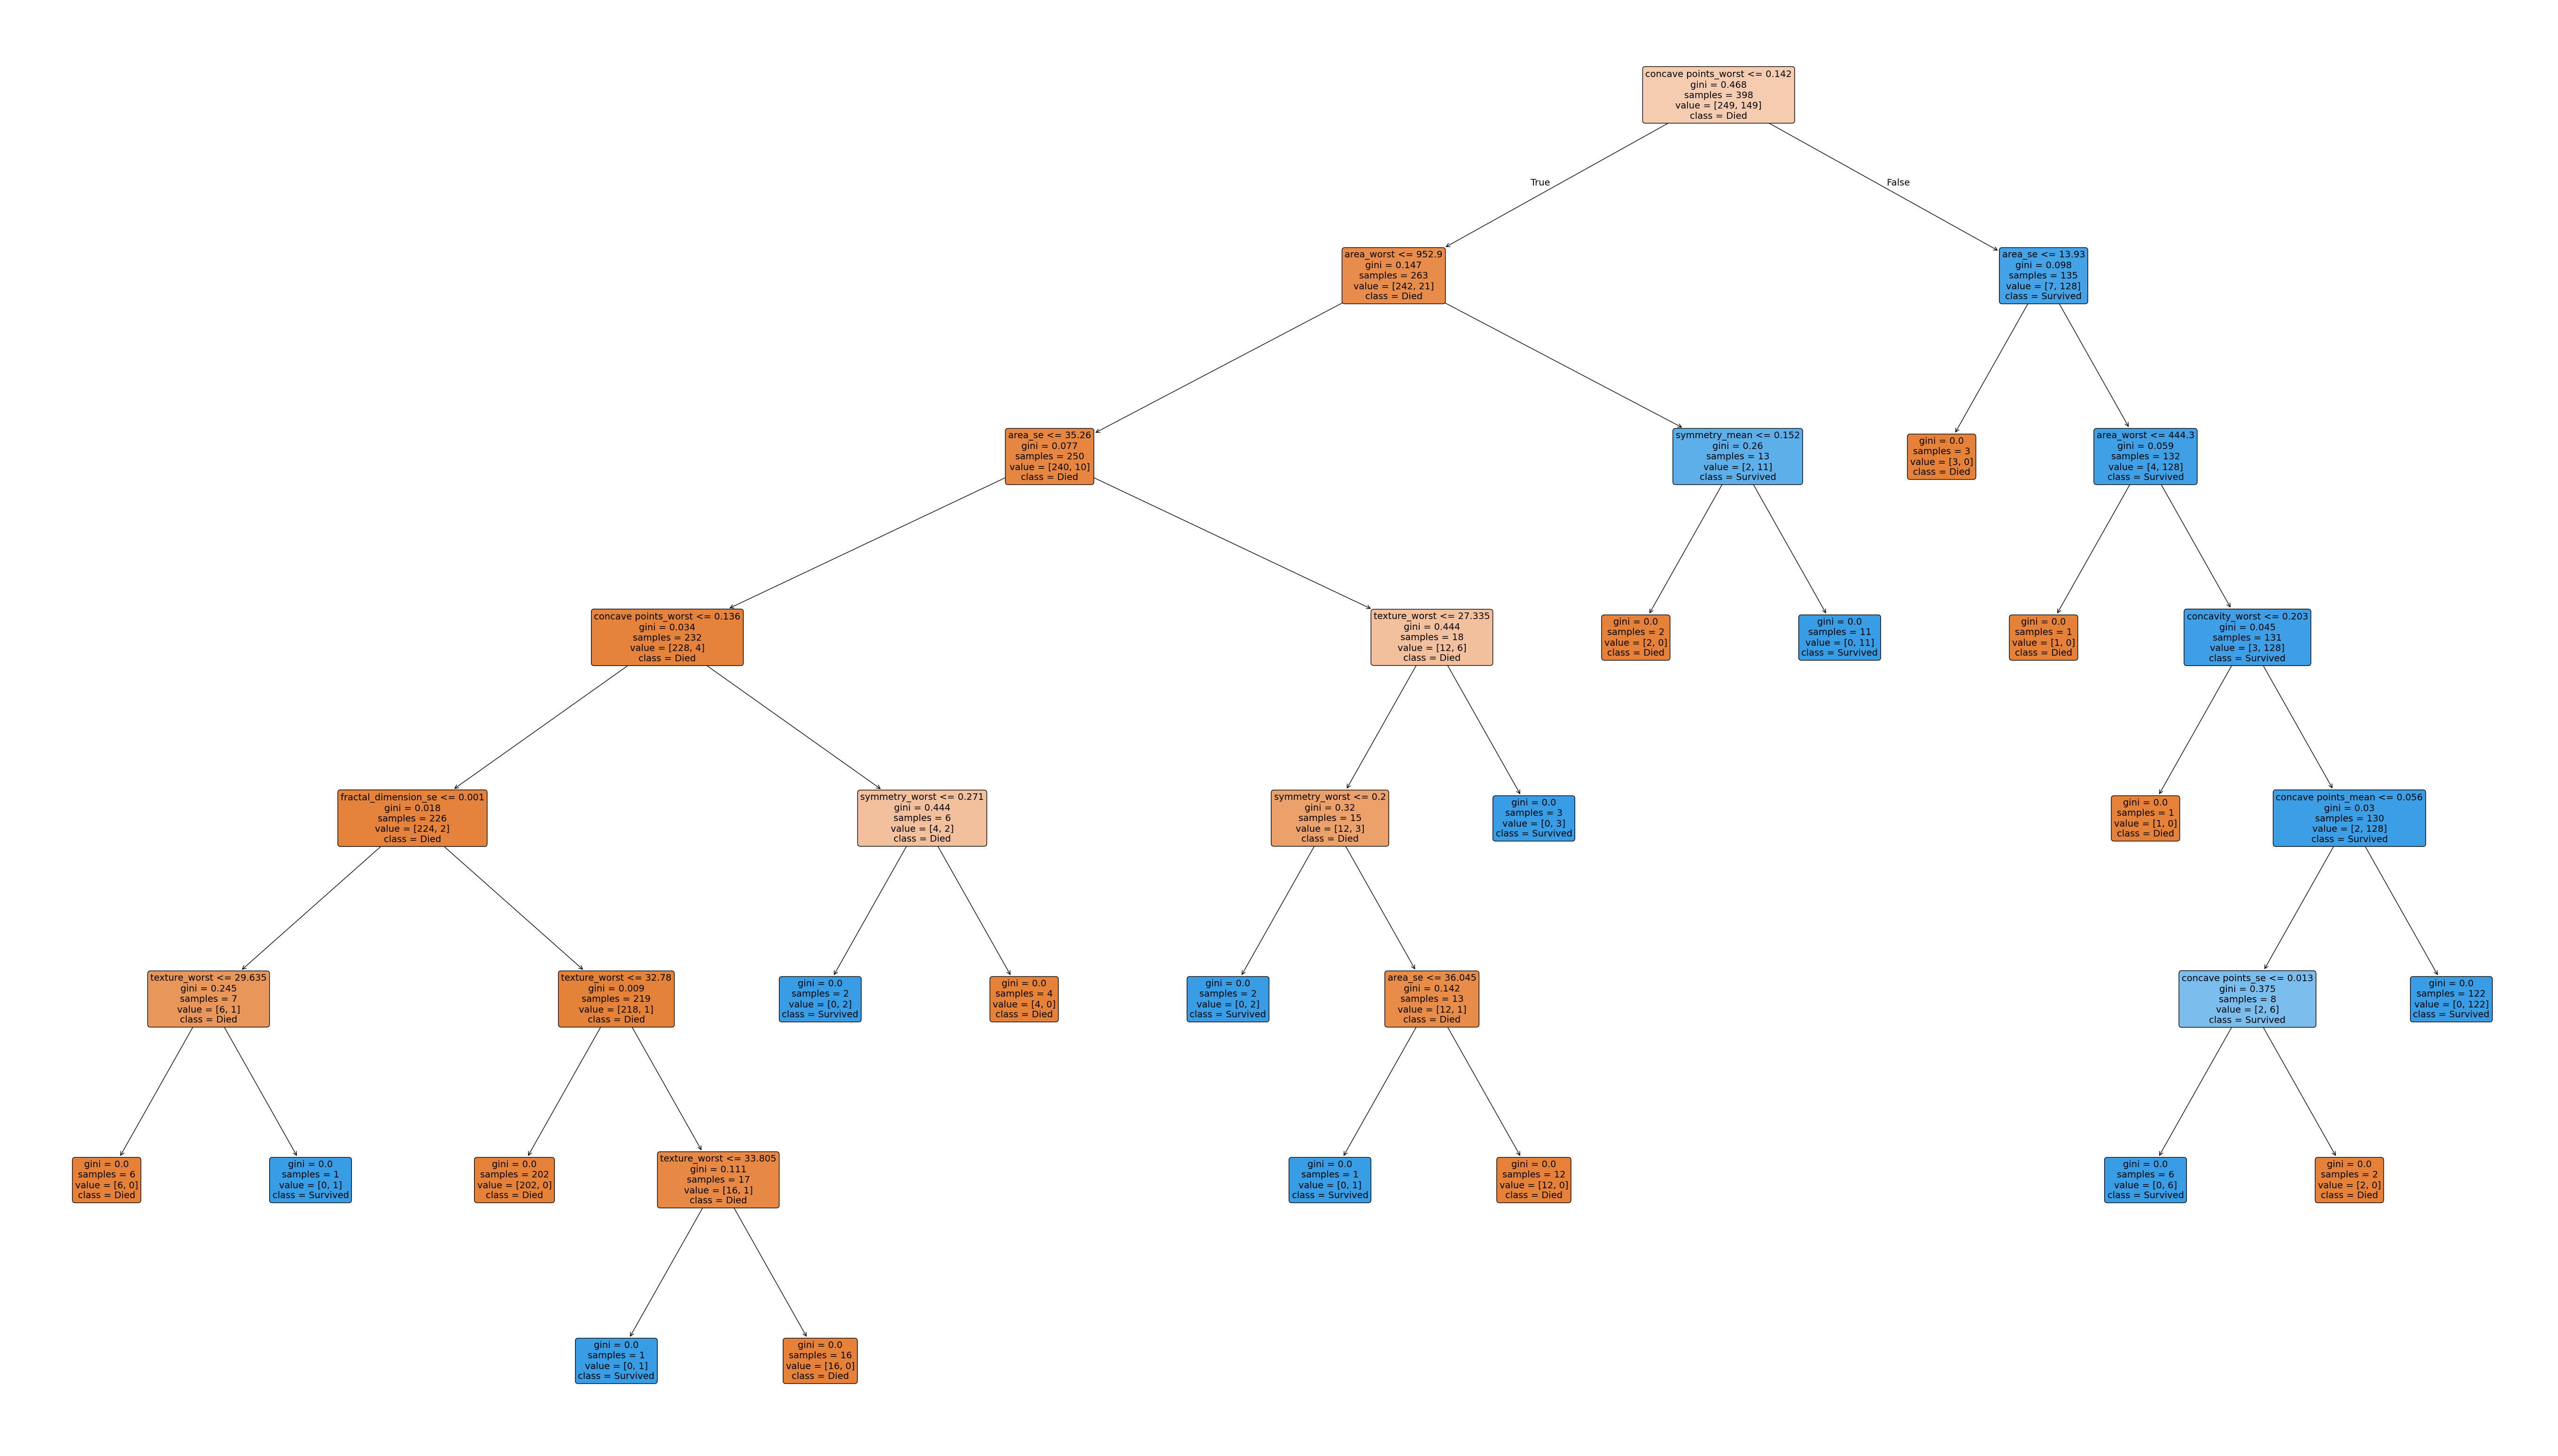

In [ ]:
#Evaluate Model
print('\nConfusion Matrix = \n', confusion_matrix(y_test, y_pred))
print('\nAccuracy = ', accuracy_score(y_test, y_pred))
print('\nPrecision = ', precision_score(y_test, y_pred))
print('\nRecall = ', recall_score(y_test, y_pred))
print('\nF1 Score = ', f1_score(y_test, y_pred))

#Print out shape of tree
from sklearn.tree import _tree, plot_tree
plt.figure('Decision Tree', figsize=(70,40))
plot_tree(classifier_model, filled=True, rounded=True, fontsize=14, feature_names=data.columns, class_names=['True','False'])
plt.show()

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.955 total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.895 total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.886 total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.925 total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.910 total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.909 total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10;, score=0.932 total time=   0.0s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10;, score=0.917 total time=   0.0s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=10;, score=0.902 total time=   0.0s
[CV 1/3] END max_depth=5, min_samples_leaf=2

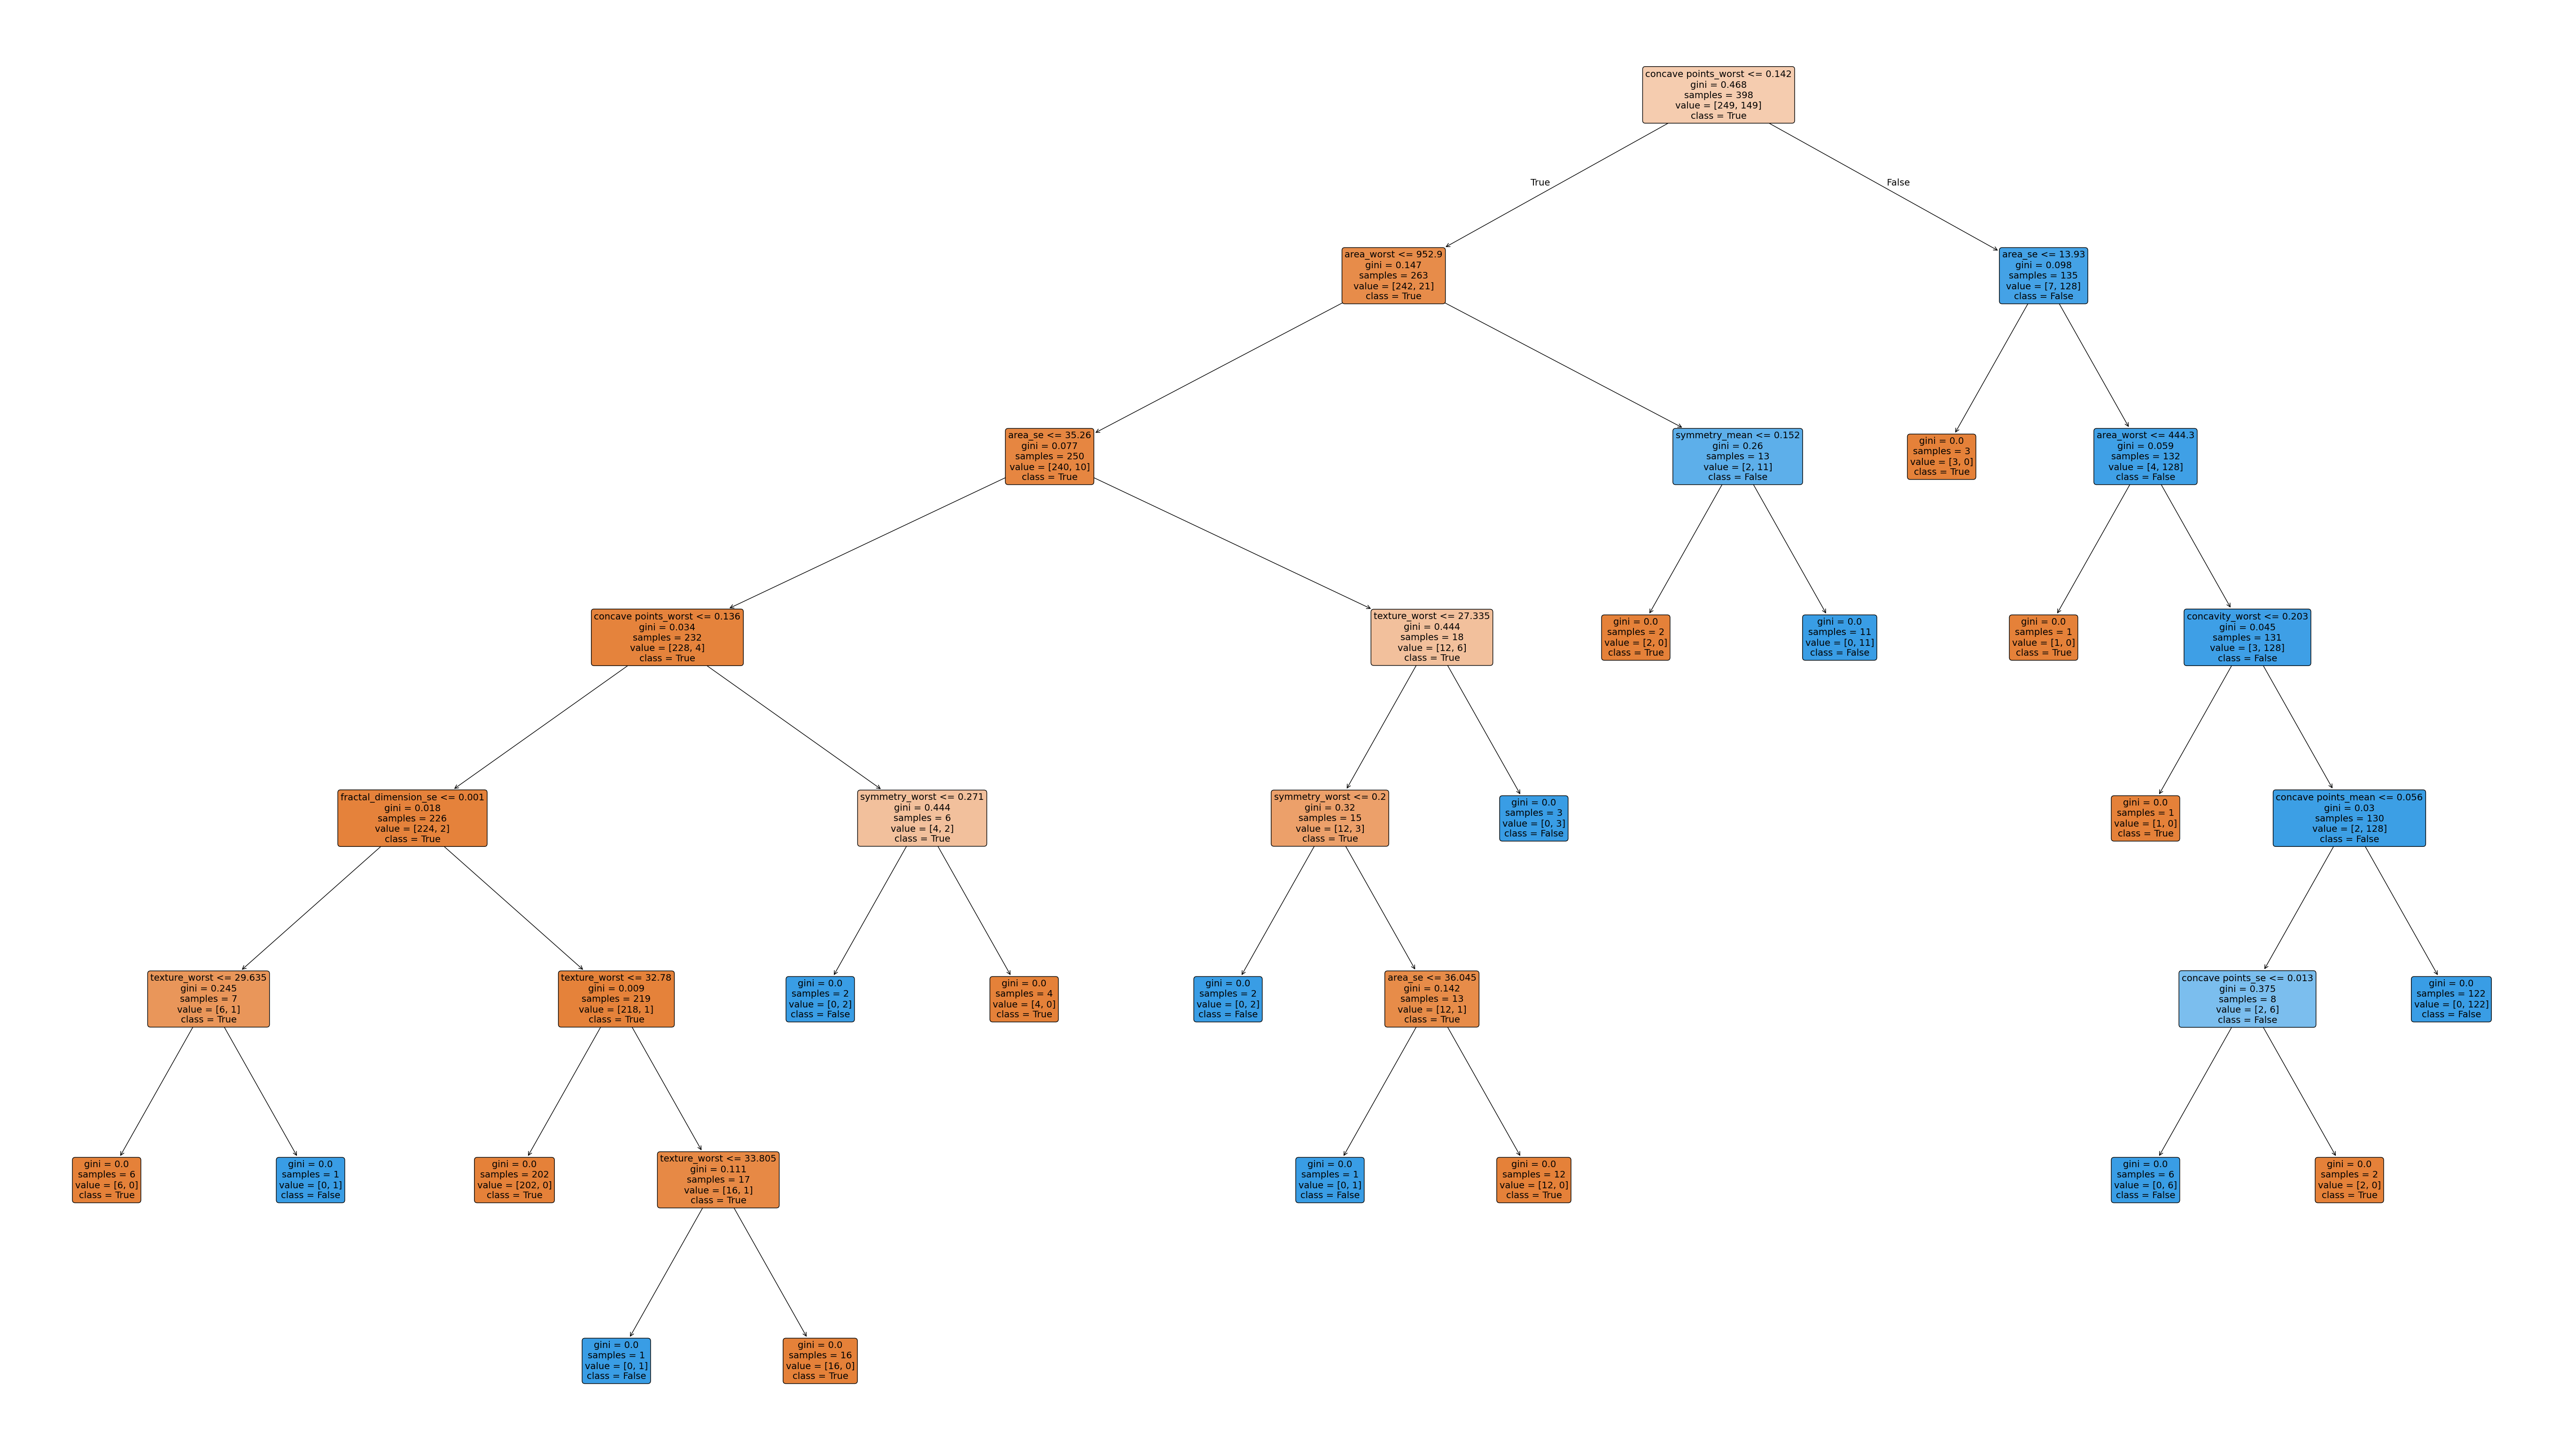

In [9]:
param_grid = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid,verbose=3, cv=3) #'Verbose' = Added information in Grid Search. 1 = Little, 2 = Average, 3 = Full info
grid.fit(X_train, y_train)
grid.best_params_
grid_predictions = grid.predict(X_test)

#Evaluate Model
print('\nConfusion Matrix = \n', confusion_matrix(y_test, y_pred))
print('\nAccuracy = ', accuracy_score(y_test, y_pred))
print('\nPrecision = ', precision_score(y_test, y_pred))
print('\nRecall = ', recall_score(y_test, y_pred))
print('\nF1 Score = ', f1_score(y_test, y_pred))

#Print out shape of tree
from sklearn.tree import _tree, plot_tree
plt.figure('Decision Tree', figsize=(70,40))
plot_tree(classifier_model, filled=True, rounded=True, fontsize=14, feature_names=data.columns, class_names=['True','False'])
plt.show()